In [1]:
from pandas import read_csv,to_numeric
from prince import FAMD
customer_churn = read_csv('../data/Customer_churn.csv', index_col="customerID")
customer_churn["TotalCharges"]=to_numeric(customer_churn["TotalCharges"],errors='coerce')
customer_churn = customer_churn.dropna()
labels = customer_churn['Churn']
customer_churn = customer_churn.drop(['Churn'], axis='columns')
customer_churn['SeniorCitizen'].replace({0: 'No', 1: 'Yes'}, inplace=True)

In [2]:
customer_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [3]:
# customer_churn = customer_churn.apply(lambda x: x.astype("category"),axis=0)
customer_churn["MonthlyCharges"]=to_numeric(customer_churn["MonthlyCharges"])
customer_churn["TotalCharges"]=to_numeric(customer_churn["TotalCharges"],errors='coerce')
customer_churn = customer_churn.dropna()
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null 

## Numerical columns

In [4]:
import numpy as np
list(set(customer_churn.select_dtypes(np.number).columns.tolist()))

['MonthlyCharges', 'TotalCharges', 'tenure']

In [5]:
famd = FAMD(n_components=5, random_state=42)
famd.fit(customer_churn)
famd.explained_inertia_

array([0.32284401, 0.1942461 , 0.07908647, 0.03969034, 0.03481335])

In [6]:
from numpy import cumsum
cumsum(famd.explained_inertia_)

array([0.32284401, 0.51709011, 0.59617658, 0.63586692, 0.67068027])

In [7]:
from update import update_csv
update_csv("FAMD",famd.explained_inertia_)

<AxesSubplot:title={'center':'Partial row principal coordinates'}, xlabel='Component 0 (32.28% inertia)', ylabel='Component 1 (19.42% inertia)'>

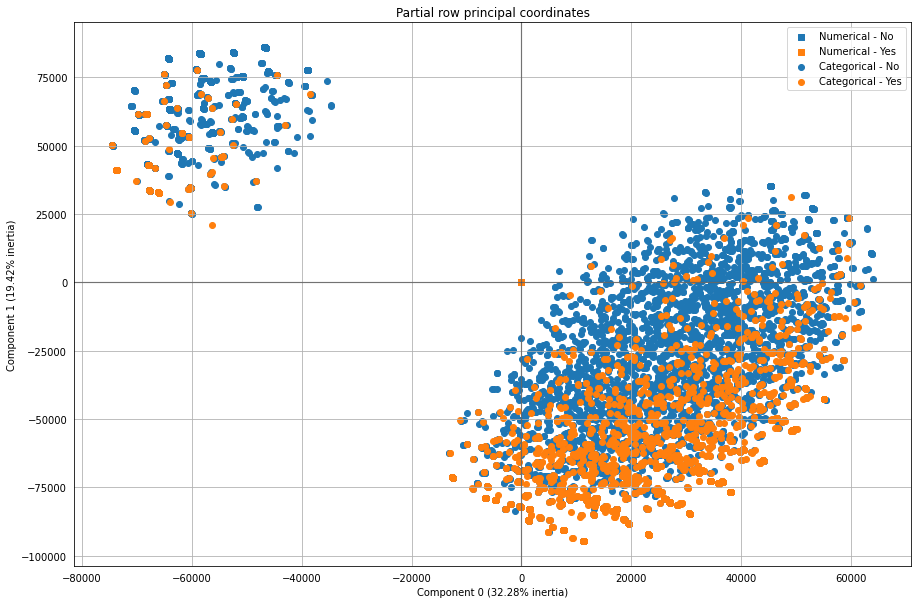

In [8]:
famd.plot_partial_row_coordinates(customer_churn,figsize=(15, 10),color_labels=labels)

<AxesSubplot:title={'center':'Partial row principal coordinates'}, xlabel='Component 0 (32.28% inertia)', ylabel='Component 1 (19.42% inertia)'>

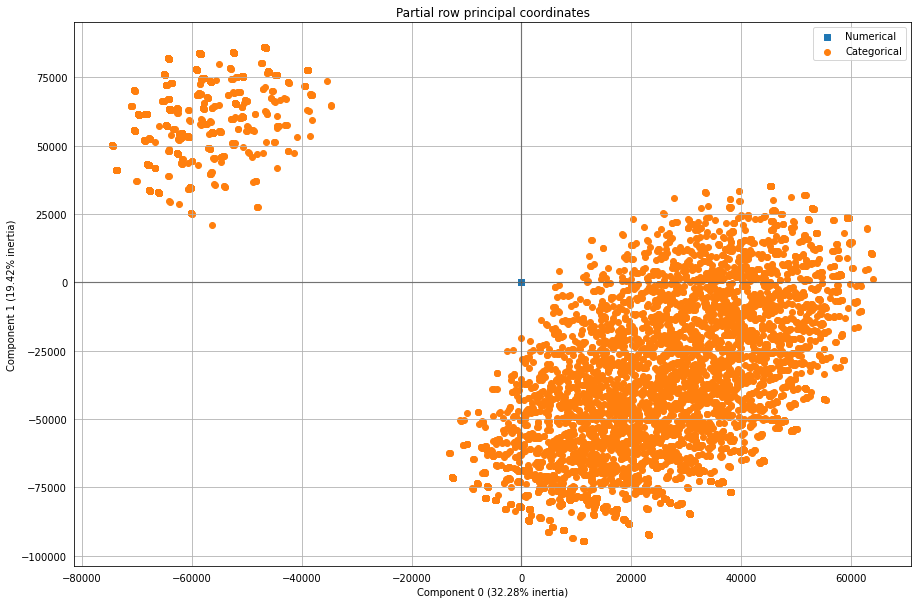

In [9]:
famd.plot_partial_row_coordinates(customer_churn,figsize=(15, 10))

<AxesSubplot:title={'center':'Row principal coordinates'}, xlabel='Component 0 (32.28% inertia)', ylabel='Component 1 (19.42% inertia)'>

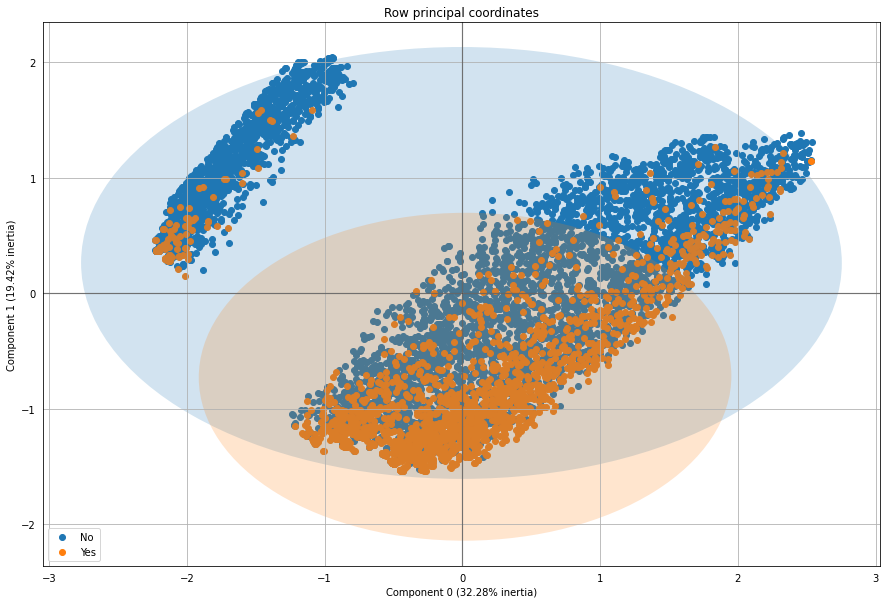

In [10]:
famd.plot_row_coordinates(customer_churn,figsize=(15, 10),color_labels=labels)